# Supplemental Figure 1

## Caption
Temperature and phosphorous averaged between 42.8$\circ$N and 43.2$\circ$N in A, B) May and C. D) August. The latitude band is centered at the mouth of the Milwaukee River. 

In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

import numpy as np
import xarray as xr
import cmocean
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import AxesGrid
#from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator


# Load data

`transect_43N.nc` is calculated from raw 3D fields. See `_process_data`

In [2]:
%run _load_directories.ipynb

DIRECTORIES
>> {dir_raw}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/raw

>> {dir_clean}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/clean

>> {dir_figs}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/results/figures


In [3]:
### Load transects
ds = xr.open_dataset(f'{dir_clean}/transect_43N.nc')

### Load grid
### Needed for when will below transect
### could just add this to netcdf
ds_grid = xr.open_dataset(f'{dir_raw}/grid_lake_michigan.nc')
lon = ds_grid['X']
bathy = ds_grid['Depth'].\
        where((ds_grid['Y']>=42.99) & (ds_grid['Y']<=43.01), drop=True).squeeze()

# Generate Figure

/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


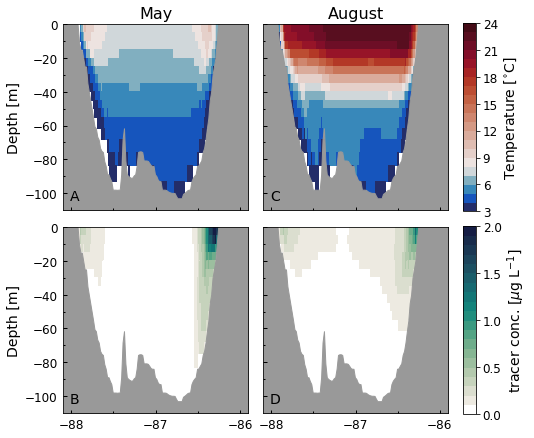

In [4]:
### ==============================================================
### Define grids
### ==============================================================
fig = plt.figure(figsize=(7.4, 7.2))
grid = AxesGrid(fig, 111, 
                share_all=False,
                nrows_ncols = (2, 2),
                axes_pad = 0.2,
                aspect=False,
                cbar_location = 'right',
                cbar_mode="edge",
                cbar_pad = 0.2,
                cbar_size = '7%',
                label_mode = 'L')  # note the empty label_mode

### ==============================================================
### Define colormap for phos
### ==============================================================
# Colormap
num_levels = 22
vmin, vmax = 3, 24
midpoint = 8
levels = np.linspace(vmin, vmax, num_levels)
midp = np.mean(np.c_[levels[:-1], levels[1:]], axis=1)
vals = np.interp(midp, [vmin, midpoint, vmax], [0, 0.5, 1])
colors = cmocean.cm.balance(vals)
cmap, norm = from_levels_and_colors(levels, colors)
 
### ==============================================================
### Plot temperature in May
### ==============================================================
posT = grid[0].pcolormesh(ds['X'], ds_grid['Zp1'],
                    ds['temp_may'], 
                    cmap = cmap, 
                    vmin = vmin, 
                    vmax = vmax,
                    norm = norm, 
                    zorder = 1)

### ==============================================================
### Plot temperature in August
### ==============================================================
grid[1].pcolormesh(ds['X'], ds_grid['Zp1'],
                    ds['temp_august'], 
                    cmap = cmap, 
                    vmin = vmin, 
                    vmax = vmax,
                    norm = norm, 
                    zorder = 1)


### ==============================================================
### Define colormap for phos
### ==============================================================
vmin, vmax = 0, 2
cmap = cmocean.cm.tempo
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1,1,1,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(vmin, vmax, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
### ==============================================================
### Plot phos in May
### ==============================================================
posP = grid[2].pcolormesh(ds['X'], ds_grid['Zp1'],
                    ds['phos_may'] * 2.5, 
                    cmap = cmap, 
                    vmin = vmin, 
                    vmax = vmax,
                    norm = norm, 
                    zorder = 1)

### ==============================================================
### Plot phos in August
### ==============================================================
grid[3].pcolormesh(ds['X'], ds_grid['Zp1'],
                    ds['phos_august'] * 2.5, 
                    cmap = cmap, 
                    vmin = vmin, 
                    vmax = vmax,
                    norm = norm, 
                    zorder = 1)

### ==============================================================
### Add colorbar
### Better to use plt with reference to cax 
### than to grid.cbar_axes[0].colorbar(sub)
### since it is clunky as all get
### ==============================================================
cbar = plt.colorbar(posT, cax=grid.cbar_axes[0])
cbar.set_label(r'Temperature [$^{\circ}$C]', fontsize=14)
cbar.set_ticks(np.arange(3, 25, 3))
cbar.ax.tick_params(labelsize=12) 

cbar2 = plt.colorbar(posP, cax=grid.cbar_axes[1])
cbar2.set_label('tracer conc. [$\mu$g L$^{-1}$]', fontsize=14)
cbar2.set_ticks(np.arange(vmin, vmax+0.1, 0.5))
cbar2.ax.tick_params(labelsize=12) 

### ==============================================================
### Make axes square
### ==============================================================
for ax in grid:
    # Set axes
    ax.set_ylim(-110, 0)
    ax.set_xticks(np.arange(-88, -84, 1))
    ax.set_xlim(-88.1, -85.9)
    
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    
    ### fill bottom
    ax.fill_between(lon, -bathy, y2=-150, color=[0.6, 0.6, 0.6])
    
    
### ==============================================================
### Add labels
### ==============================================================
### titles
grid[0].set_title('May', fontsize=16)
grid[1].set_title('August', fontsize=16)
### y labels
grid[0].axes.yaxis.set_label_text('Depth [m]', fontsize=14) 
grid[2].axes.yaxis.set_label_text('Depth [m]', fontsize=14) 


### ==============================================================
### Subplot labels
### ==============================================================
label_a = AnchoredText("A", loc=3, prop=dict(size=14), frameon=False, pad=0.5, borderpad=0)
label_b = AnchoredText("B", loc=3, prop=dict(size=14), frameon=False, pad=0.5, borderpad=0)
label_c = AnchoredText("C", loc=3, prop=dict(size=14), frameon=False, pad=0.5, borderpad=0)
label_d = AnchoredText("D", loc=3, prop=dict(size=14), frameon=False, pad=0.5, borderpad=0)
grid[0].add_artist(label_a)
grid[2].add_artist(label_b)
grid[1].add_artist(label_c)
grid[3].add_artist(label_d)

### ==============================================================
### Minor ticks
### ==============================================================
for ax in grid:
    ax.tick_params(axis='both', 
               which='both', 
               direction='in', 
               width=1, 
               color='k', 
               pad=5, 
               labelsize=12)
    
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

In [5]:
fig.savefig(f'{dir_figs}/Supplemental_Figure_1.pdf', bbox_inches='tight',pad_inches=0)

/usr/local/python/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
